In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random as rd

In [3]:
data= pd.read_csv(r"C:\Users\georg\OneDrive\Desktop\ENTRI\PYTHON\myexcel.csv")
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


# DATA CLEANING AND PREPROCESSING
### Step 1:
#### Since the 'Height' column given in the data is wrong data, as per the requirement we will generate random integers between 150 and 180 using randint function from random module.


In [5]:
data['Height']=np.random.randint(150,181,size=len(data)) ## helps to generate random integers between 150 and 180 for height column

In [6]:
data['Height']=data['Height'].astype(int)  ## changes datatype of height to integer from object

In [7]:
data.isnull().sum() ## to find the total number of null values in each column

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [8]:
data.isnull().mean()*100  #percentage of null values

Name         0.000000
Team         0.000000
Number       0.000000
Position     0.000000
Age          0.000000
Height       0.000000
Weight       0.000000
College     18.340611
Salary       2.401747
dtype: float64

### Step2:
#### Since we have about 84 null values and 11 null values in College and Salary column respectively,we can replace the NA values in College column with 'Not Provided' and Salary column with median value for analysis purposes.

In [9]:
salary_median=data['Salary'].median()
salary_median

2836186.0

In [10]:
data.fillna({'Salary': salary_median}, inplace=True) #replace NA rows in 'Salary' column with median salary

In [11]:
data.fillna({'College': 'Not Provided'}, inplace=True) #replace NA rows in 'College' column with 'Not provided'

In [12]:
data.isnull().mean() #null values has been become 0.

Name        0.0
Team        0.0
Number      0.0
Position    0.0
Age         0.0
Height      0.0
Weight      0.0
College     0.0
Salary      0.0
dtype: float64

In [13]:
data.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

## **ANALYSIS**

#### 1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees. 

In [14]:
total_employees=data['Name'].value_counts().sum()
total_employees

458

In [16]:
employees_teamwise=data['Team'].value_counts()
employees_teamwise

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

In [17]:
employees_teamwise_percent=((employees_teamwise/total_employees)*100).round(2).sort_values(ascending=False)
employees_teamwise_percent

Team
New Orleans Pelicans      4.15
Memphis Grizzlies         3.93
Utah Jazz                 3.49
New York Knicks           3.49
Milwaukee Bucks           3.49
Detroit Pistons           3.28
Dallas Mavericks          3.28
Philadelphia 76ers        3.28
Toronto Raptors           3.28
Golden State Warriors     3.28
Los Angeles Clippers      3.28
Los Angeles Lakers        3.28
Phoenix Suns              3.28
Sacramento Kings          3.28
Chicago Bulls             3.28
Cleveland Cavaliers       3.28
Boston Celtics            3.28
Indiana Pacers            3.28
Houston Rockets           3.28
San Antonio Spurs         3.28
Atlanta Hawks             3.28
Charlotte Hornets         3.28
Miami Heat                3.28
Washington Wizards        3.28
Denver Nuggets            3.28
Oklahoma City Thunder     3.28
Portland Trail Blazers    3.28
Brooklyn Nets             3.28
Orlando Magic             3.06
Minnesota Timberwolves    3.06
Name: count, dtype: float64

In [18]:
employees_teamwise.count()

30

In [19]:
bar_chart_data=pd.DataFrame(employees_teamwise_percent).reset_index()
bar_chart_data

,Team,count
0,New Orleans Pelicans,4.15
1,Memphis Grizzlies,3.93
2,Utah Jazz,3.49
3,New York Knicks,3.49
4,Milwaukee Bucks,3.49
5,Detroit Pistons,3.28
6,Dallas Mavericks,3.28
7,Philadelphia 76ers,3.28
8,Toronto Raptors,3.28
9,Golden State Warriors,3.28


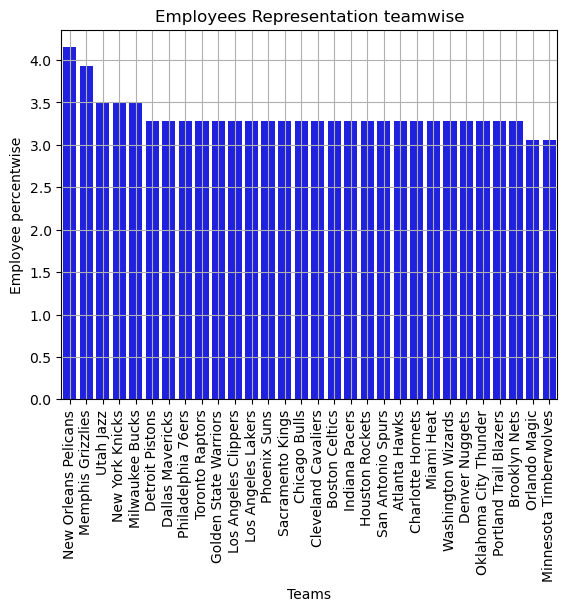

In [20]:
sns.barplot(bar_chart_data,x="Team",y="count",color="b")
plt.title("Employees Representation teamwise")
plt.xlabel("Teams")
plt.ylabel("Employee percentwise")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

##### **INSIGHT**:
##### From the data we can infer that there are 30 teams and among that Team "New Orleans Pelicans" has the most number of employees which is 4.15% out of a total of 458 employees.Most of the teams have same employee ratio percentage which is 3.28%.
##### Team "Minnesota Timberwolves" and "Orlando Magic" has the least team members which is 3.06%.

#### 2. Segregate employees based on their positions within the company. 

In [21]:
employees_positionwise=pd.DataFrame(data['Position'].value_counts()).reset_index()
employees_positionwise

,Position,count
0,SG,102
1,PF,100
2,PG,92
3,SF,85
4,C,79


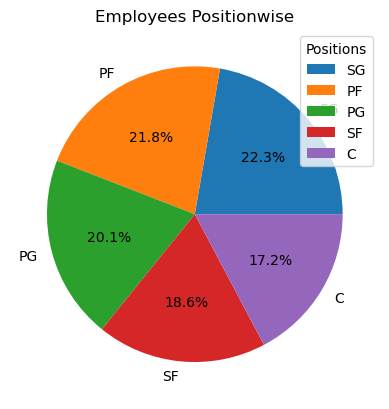

In [22]:
plt.pie(employees_positionwise['count'],labels=employees_positionwise['Position'],autopct='%1.1f%%')
plt.title("Employees Positionwise")
plt.legend(title="Positions",loc='upper right')
plt.show()

##### **INSIGHT**
##### Out of 458 employees,22.3% which amounts to a count of 102 are in SG position whereas only 17.2 % are in C position.We can infer that alemployee ratio in each position is almost same and there is no much variability.

#### 3.Identify the predominant age group among employees.

In [23]:
hist_plot_data=pd.DataFrame(data['Age'])

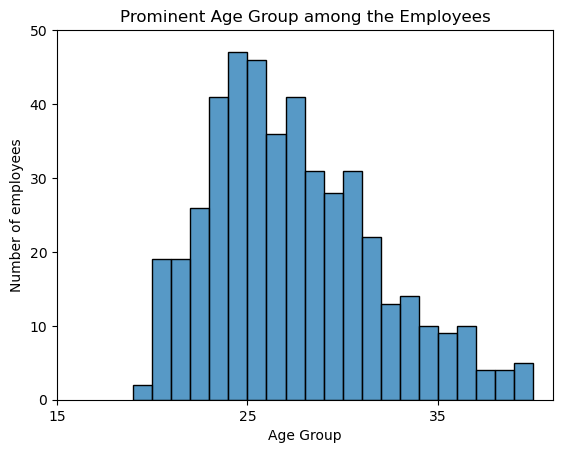

In [24]:
sns.histplot(data=hist_plot_data,x='Age',bins=1,binwidth=1)
plt.title("Prominent Age Group among the Employees")
plt.xlabel("Age Group")
plt.ylabel("Number of employees")        
plt.xticks(np.arange(15, 45, step=10),fontsize=10)
plt.yticks(np.arange(0, 60, step=10),fontsize=10)
plt.show()

##### **INSIGHT**
##### From the histogram, we can infer that most of employees belong to the age group between 25-30.After the age of 30,there is a significant decrease in the number of employees hired by the company.

#### 4. Discover which team and position have the highest salary expenditure

In [25]:
salary_expenditure_teamwise=data.groupby(['Team','Position'])['Salary'].sum().sort_values(ascending=False).reset_index()
salary_expenditure_teamwise

,Team,Position,Salary
0,Los Angeles Lakers,SF,31866445.0
1,Miami Heat,PF,31538671.0
2,Houston Rockets,SG,28122883.0
3,Phoenix Suns,PG,28002998.0
4,Denver Nuggets,SF,27982771.0
...,...,...,...
144,Milwaukee Bucks,SF,3104287.0
145,Philadelphia 76ers,SF,1845059.0
146,Sacramento Kings,PF,1370152.0
147,Miami Heat,C,981348.0


In [26]:
salary_expenditure_teamwise.head(1)

,Team,Position,Salary
0,Los Angeles Lakers,SF,31866445.0


In [27]:
data.groupby(['Team'])['Salary'].sum().sort_values(ascending=False).reset_index().head(5)


,Team,Salary
0,Cleveland Cavaliers,109824875.0
1,Los Angeles Clippers,94854640.0
2,Oklahoma City Thunder,93765298.0
3,Golden State Warriors,88868997.0
4,Miami Heat,88188045.0


In [28]:
data.groupby(['Position'])['Salary'].sum().sort_values(ascending=False).reset_index().head(5)

,Position,Salary
0,C,466377332.0
1,PG,458193715.0
2,PF,451069408.0
3,SF,410857162.0
4,SG,405484816.0


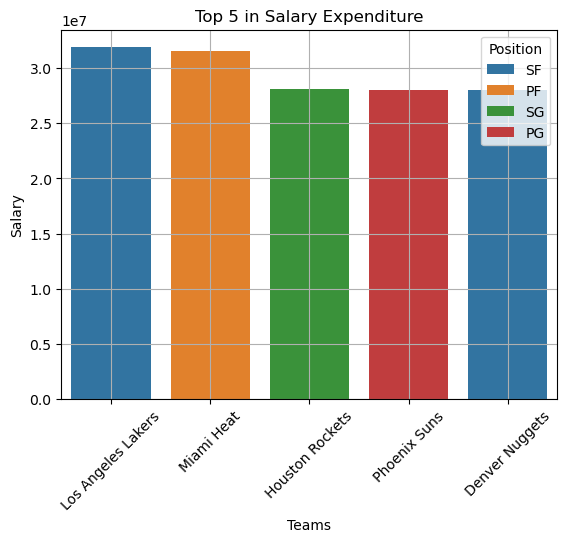

In [49]:
sns.barplot(salary_expenditure_teamwise.head(5),x="Team",y="Salary",hue="Position")
plt.title("Top 5 in Salary Expenditure")
plt.xlabel("Teams")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### **INSIGHT**
##### It is clear that SF position from the team "Los Angeles Lakers" has the highest salary expenditure followed by the PF position from team "Miami Heat".Among the top 5 , we can see SF postion from team "Denver Nuggets" in 5th position.This is the inference when we anlayse the salary expenditure teamwise put in together with position.
##### But, when we analyse the salary expenditure separately for Position and team, we can see that position 'C' has the highest salary expenditure and teamwise team 'Cleveland Cavaliers' has the highest salary expenditure.

#### 5. Investigate if there's any correlation between age and salary, and represent it visually.

In [29]:
scatter_plot_data=data[['Age','Salary']]

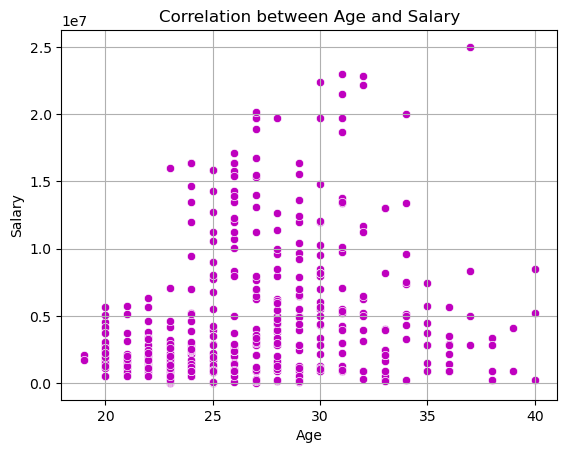

In [30]:
sns.scatterplot(data=scatter_plot_data,x='Age',y='Salary',markers="o",color='m')
plt.title("Correlation between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.show()


##### **INSIGHT**
##### There does not appear a strong correlation between the Age and Salary ,although salary seems to slightly increase with the age for some individuals.This trend is inconsistent.
##### Among the same age group(30-35), there is high variability in the salaries of the employees implying that attributes other than age like job position,company and experience contribute to their high/low salaries.
##### Most of the individuals draw salary below 10 M irrespective of their age.